# Example for using the Metric Class

In this notebook we will see how `Metric` and `MetricsList` Classes work



### To install this library:

In [1]:
!pip install https://github.com/4n4nd/prometheus-api-client-python/zipball/v0.0.2

!pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple
     \ 512kB 4.2MB/s
  Stored in directory: /tmp/pip-ephem-wheel-cache-si8ss22n/wheels/c7/23/9a/056a73f49046d4d046c4aab35ae77dd45343d216d5c92ee790
Successfully built prometheus-api-client
Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


In [2]:
from prometheus_api_client import Metric, MetricsList, PrometheusConnect
from prometheus_api_client.utils import parse_datetime, parse_timedelta

import matplotlib.pyplot as plt
%matplotlib inline

After importing all the necessary modules, we can start with collecting some data from a prometheus host

Lets create a `PrometheusConnect` object which stores the connection parameters

In [3]:
pc = PrometheusConnect(url="http://prometheus-route-aiops-prod-prometheus-predict.cloud.paas.psi.redhat.com", disable_ssl=True)

Now we make a query which collects the past 3 days of a specific metric (`'badger_disk_writes:rate1m_Fourier'`) in chunks of 1 day

The specific query that we make matches 4 different metric time-series, so the data that we receive should have 4 different metrics in it

In [4]:
# Major change from the previous version
start_time = parse_datetime("3d")
end_time = parse_datetime("now")
chunk_size = parse_timedelta("now", "1d")

metric_data = pc.get_metric_range_data(
    'badger_disk_writes:rate1m_Fourier{ae_source="https://prometheus-exporter-alpha-0.thoth-dgraph-stage.svc:8080/debug/prometheus_metrics",instance="prometheus-aggregate-exporter-thoth-dgraph-stage.cloud.paas.psi.redhat.com:80",job="Thoth Dgraph aggregate-exporter (stage)",monitor="datahub"}',
    start_time=start_time,
    end_time=end_time,
    chunk_size=chunk_size,
)

In [5]:
len(metric_data)

12

We see 12 different items because it is 4 different metrics with 3 chunks for each, each chunk is 1 day of data

In [6]:
for metric in metric_data:
    print(metric["metric"], "\n")

{'__name__': 'badger_disk_writes:rate1m_Fourier', 'ae_source': 'https://prometheus-exporter-alpha-0.thoth-dgraph-stage.svc:8080/debug/prometheus_metrics', 'instance': 'prometheus-aggregate-exporter-thoth-dgraph-stage.cloud.paas.psi.redhat.com:80', 'job': 'Thoth Dgraph aggregate-exporter (stage)', 'monitor': 'datahub', 'value_type': 'anomaly'} 

{'__name__': 'badger_disk_writes:rate1m_Fourier', 'ae_source': 'https://prometheus-exporter-alpha-0.thoth-dgraph-stage.svc:8080/debug/prometheus_metrics', 'instance': 'prometheus-aggregate-exporter-thoth-dgraph-stage.cloud.paas.psi.redhat.com:80', 'job': 'Thoth Dgraph aggregate-exporter (stage)', 'monitor': 'datahub', 'value_type': 'yhat'} 

{'__name__': 'badger_disk_writes:rate1m_Fourier', 'ae_source': 'https://prometheus-exporter-alpha-0.thoth-dgraph-stage.svc:8080/debug/prometheus_metrics', 'instance': 'prometheus-aggregate-exporter-thoth-dgraph-stage.cloud.paas.psi.redhat.com:80', 'job': 'Thoth Dgraph aggregate-exporter (stage)', 'monitor': 

We can see that we received 3 chunks for each of the 4 metrics, these chunks make downloading data easier, but they are a little hard to keep track of.

To keep track of multiple metrics each with multiple chunks distributed in a list, we created the `Metric` and `MetricsList` classes

### How `MetricsList` works
To combine the chunks for each metric, we can initialize a `MetricsList` object <br>
It creates a list of `Metric` objects, where each object is unique for a specific time-series.

In [7]:
metrics_object_list = MetricsList(metric_data)
print(len(metrics_object_list))
for item in metrics_object_list:
    print(type(item))

4
<class 'prometheus_api_client.metric.Metric'>
<class 'prometheus_api_client.metric.Metric'>
<class 'prometheus_api_client.metric.Metric'>
<class 'prometheus_api_client.metric.Metric'>


Above we can see that `metrics_object_list` has only 4 items and each item is a `Metric` object.


In [8]:
for item in metrics_object_list:
    print(item.metric_name, item.label_config, "\n")

badger_disk_writes:rate1m_Fourier {'ae_source': 'https://prometheus-exporter-alpha-0.thoth-dgraph-stage.svc:8080/debug/prometheus_metrics', 'instance': 'prometheus-aggregate-exporter-thoth-dgraph-stage.cloud.paas.psi.redhat.com:80', 'job': 'Thoth Dgraph aggregate-exporter (stage)', 'monitor': 'datahub', 'value_type': 'anomaly'} 

badger_disk_writes:rate1m_Fourier {'ae_source': 'https://prometheus-exporter-alpha-0.thoth-dgraph-stage.svc:8080/debug/prometheus_metrics', 'instance': 'prometheus-aggregate-exporter-thoth-dgraph-stage.cloud.paas.psi.redhat.com:80', 'job': 'Thoth Dgraph aggregate-exporter (stage)', 'monitor': 'datahub', 'value_type': 'yhat'} 

badger_disk_writes:rate1m_Fourier {'ae_source': 'https://prometheus-exporter-alpha-0.thoth-dgraph-stage.svc:8080/debug/prometheus_metrics', 'instance': 'prometheus-aggregate-exporter-thoth-dgraph-stage.cloud.paas.psi.redhat.com:80', 'job': 'Thoth Dgraph aggregate-exporter (stage)', 'monitor': 'datahub', 'value_type': 'yhat_lower'} 

badg

All 4 items are unique metric time-series, none of them are repeated. 

The constructor for `MetricsList` combined all the chunks for each metric time-series in a single `Metric` object

-----
## More about the `Metric` class
Let's look at one of the metrics from the `metrics_object_list` to learn more about the `Metric` class

In [9]:
my_metric_object = metrics_object_list[1] # one of the metrics from the list
print(type(my_metric_object))

<class 'prometheus_api_client.metric.Metric'>


What happens when we try to print the object?

In [10]:
print(my_metric_object)

{
metric_name: 'badger_disk_writes:rate1m_Fourier'
label_config: {'ae_source': 'https://prometheus-exporter-alpha-0.thoth-dgraph-stage.svc:8080/debug/prometheus_metrics', 'instance': 'prometheus-aggregate-exporter-thoth-dgraph-stage.cloud.paas.psi.redhat.com:80', 'job': 'Thoth Dgraph aggregate-exporter (stage)', 'monitor': 'datahub', 'value_type': 'yhat'}
metric_values:                                 ds         y
0    2019-08-05 19:43:10.543999910  6.137609
1    2019-08-05 19:44:10.542999983  6.139020
2    2019-08-05 19:45:10.542999983  6.140434
3    2019-08-05 19:46:10.542999983  6.141849
4    2019-08-05 19:47:10.542999983  6.143267
5    2019-08-05 19:48:10.542999983  6.144687
6    2019-08-05 19:49:10.543999910  6.146109
7    2019-08-05 19:50:10.542999983  6.147532
8    2019-08-05 19:51:10.542999983  6.148958
9    2019-08-05 19:52:10.542999983  6.150386
10   2019-08-05 19:53:10.543999910  6.151816
11   2019-08-05 19:54:10.542999983  6.153248
12   2019-08-05 19:55:10.542999983  6.1546

The `Metric` object has 3 properties.

They are,

* `metric_name`: stores the name of the metric as a string

* `label_config`: stores metric labels and values as a dict

* `metric_values`: metric values as a pandas dataframe

In [11]:
my_metric_object.metric_name

'badger_disk_writes:rate1m_Fourier'

In [12]:
my_metric_object.label_config

{'ae_source': 'https://prometheus-exporter-alpha-0.thoth-dgraph-stage.svc:8080/debug/prometheus_metrics',
 'instance': 'prometheus-aggregate-exporter-thoth-dgraph-stage.cloud.paas.psi.redhat.com:80',
 'job': 'Thoth Dgraph aggregate-exporter (stage)',
 'monitor': 'datahub',
 'value_type': 'yhat'}

In [13]:
my_metric_object.metric_values

,ds,y
0,2019-08-05 19:43:10.543999910,6.137609
1,2019-08-05 19:44:10.542999983,6.139020
2,2019-08-05 19:45:10.542999983,6.140434
3,2019-08-05 19:46:10.542999983,6.141849
4,2019-08-05 19:47:10.542999983,6.143267
5,2019-08-05 19:48:10.542999983,6.144687
6,2019-08-05 19:49:10.543999910,6.146109
7,2019-08-05 19:50:10.542999983,6.147532
8,2019-08-05 19:51:10.542999983,6.148958
9,2019-08-05 19:52:10.542999983,6.150386


### The `==` operator
What happens when you do `metric_object_1 == metric_object_2`? <br>
The `==` comparison operator checks if `metric_object_1` and `metric_object_2` belong to the same metric time-series.

Let's initialize a `Metric` object for each of the chunks that we downloaded from prometheus in `metric_data`

In [14]:
metric_object_chunk_list = []
for raw_metric in metric_data:
    metric_object_chunk_list.append(Metric(raw_metric))

Lets look at the metric_name and label_config for the first two metrics

In [15]:
print(metric_object_chunk_list[0].metric_name, metric_object_chunk_list[0].label_config)
print("\n-------------------------------------------------------------------------------\n")
print(metric_object_chunk_list[1].metric_name, metric_object_chunk_list[1].label_config)

badger_disk_writes:rate1m_Fourier {'ae_source': 'https://prometheus-exporter-alpha-0.thoth-dgraph-stage.svc:8080/debug/prometheus_metrics', 'instance': 'prometheus-aggregate-exporter-thoth-dgraph-stage.cloud.paas.psi.redhat.com:80', 'job': 'Thoth Dgraph aggregate-exporter (stage)', 'monitor': 'datahub', 'value_type': 'anomaly'}

-------------------------------------------------------------------------------

badger_disk_writes:rate1m_Fourier {'ae_source': 'https://prometheus-exporter-alpha-0.thoth-dgraph-stage.svc:8080/debug/prometheus_metrics', 'instance': 'prometheus-aggregate-exporter-thoth-dgraph-stage.cloud.paas.psi.redhat.com:80', 'job': 'Thoth Dgraph aggregate-exporter (stage)', 'monitor': 'datahub', 'value_type': 'yhat'}


Here both objects have the same metric name, but the label_configs have one different value (`value_type`), which means they belong to different metric time-series.

Hence, when we compare them `metric_object_chunk_list[0]==metric_object_chunk_list[1]` it should return false

In [16]:
print(metric_object_chunk_list[0]==metric_object_chunk_list[1])

False


Let's compare two `Metric` objects which belong to the same metric time-series

In [17]:
print(metric_object_chunk_list[0].metric_name, metric_object_chunk_list[0].label_config)
print("\n-------------------------------------------------------------------------------\n")
print(metric_object_chunk_list[4].metric_name, metric_object_chunk_list[4].label_config)

badger_disk_writes:rate1m_Fourier {'ae_source': 'https://prometheus-exporter-alpha-0.thoth-dgraph-stage.svc:8080/debug/prometheus_metrics', 'instance': 'prometheus-aggregate-exporter-thoth-dgraph-stage.cloud.paas.psi.redhat.com:80', 'job': 'Thoth Dgraph aggregate-exporter (stage)', 'monitor': 'datahub', 'value_type': 'anomaly'}

-------------------------------------------------------------------------------

badger_disk_writes:rate1m_Fourier {'ae_source': 'https://prometheus-exporter-alpha-0.thoth-dgraph-stage.svc:8080/debug/prometheus_metrics', 'instance': 'prometheus-aggregate-exporter-thoth-dgraph-stage.cloud.paas.psi.redhat.com:80', 'job': 'Thoth Dgraph aggregate-exporter (stage)', 'monitor': 'datahub', 'value_type': 'anomaly'}


In [18]:
print(metric_object_chunk_list[0]==metric_object_chunk_list[4])

True


Here, even though `metric_object_chunk_list[0]` and `metric_object_chunk_list[4]` have different metric_values stored in them, <br>the `==` operator returns `True` this is because they belong to the same metric time-series

----
### The `+` operator
What happens when you do `metric_object_1 + metric_object_2`?

Two `Metric` objects that belong to the same metric time-series, when added together, return a new `Metric` object with the combined metric_values that are stored in both objects

Lets try this on `metric_object_chunk_list[0]` and `metric_object_chunk_list[4]` because we know they belong to the same metric time-series

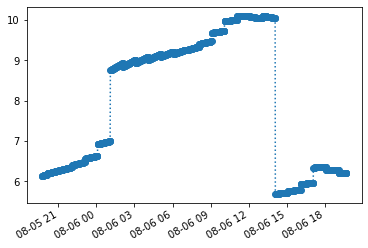

In [24]:
metric_object_chunk_list[1].plot() # plot metric-1

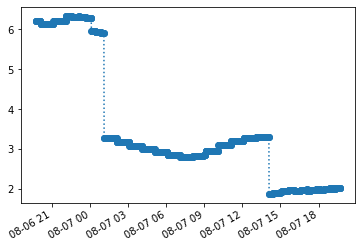

In [25]:
metric_object_chunk_list[5].plot() # plot metric-2

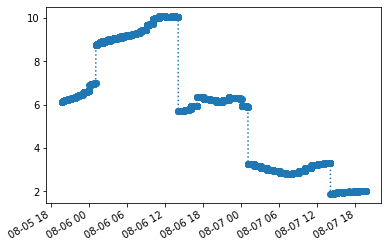

In [23]:
(metric_object_chunk_list[1] + metric_object_chunk_list[5]).plot() # plot metric-1 + metric-2

we can see the plot of the sum of metrics includes the combined data from both the previous metrics

What happens when you try to add two `Metric` objects that belong to different metric time-series?

In [22]:
metric_object_chunk_list[0] + metric_object_chunk_list[1]

TypeError: Cannot Add different metric types. Different metric labels

### Plotting
The `Metric` class also has a `plot()`method which lets you plot very simple time-series line graphs

In [ ]:
for item in metrics_object_list:
    item.plot()